In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train_len = len(train)
test_len = len(test)
train_len
test_len

367

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.

In [7]:
loan=pd.concat([train, test], sort=False)
loan.info()
loan.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
train_Approved=train['Loan_Status']
train.drop(columns=['Loan_Status'], inplace=True)


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


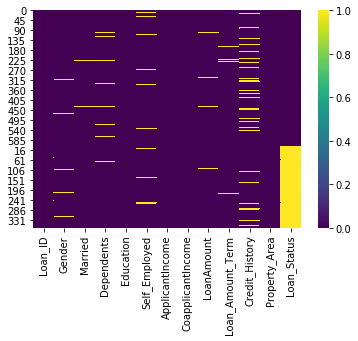

In [10]:
sns.heatmap(loan.isnull(), cmap='viridis')

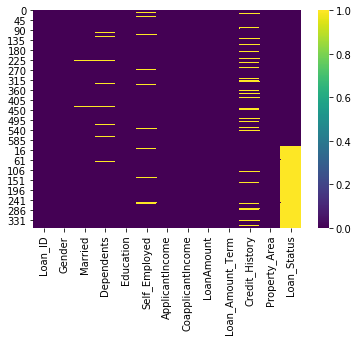

In [11]:
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Gender']=loan['Gender'].fillna('Male')
sns.heatmap(loan.isnull(),cmap='viridis')

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


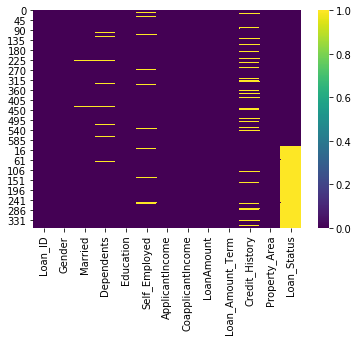

In [13]:
sns.heatmap(loan.isnull(),cmap='viridis')

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [15]:
loan['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [16]:
loan['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

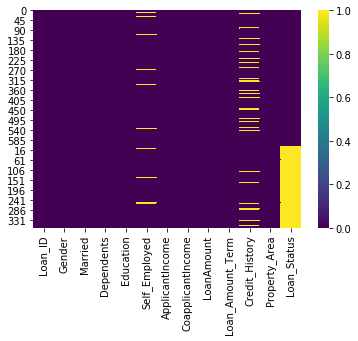

In [17]:
loan['Dependents'] = loan['Dependents'].fillna(0)
loan['Married'] = loan['Married'].fillna('Yes')
sns.heatmap(loan.isnull(),cmap='viridis')

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [19]:
loan['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

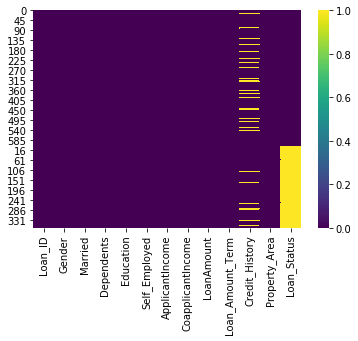

In [20]:
loan['Self_Employed'] = loan['Self_Employed'].fillna('No')
sns.heatmap(loan.isnull(),cmap='viridis')

In [21]:
loan['Credit_History'] = loan['Credit_History'].fillna(('Missing'))


In [22]:
loan['Credit_History'].value_counts()

1.0        754
0.0        148
Missing     79
Name: Credit_History, dtype: int64

In [23]:
loan.loc[(loan['Credit_History']=='Missing') & (loan['Loan_Status'] ==1), 'Credit_History'] =1
loan.loc[(loan['Credit_History']=='Missing') & (loan['Loan_Status'] ==0), 'Credit_History'] =0

In [24]:
loan['Credit_History'].value_counts()

1.0        754
0.0        148
Missing     79
Name: Credit_History, dtype: int64

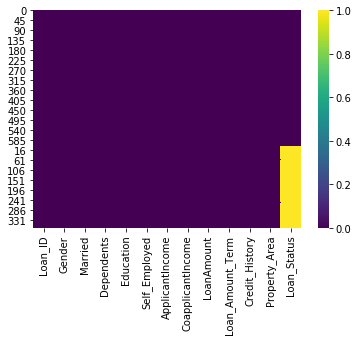

In [25]:
sns.heatmap(loan.isnull(),cmap='viridis')

In [26]:
loan.drop(columns=['Loan_Status'], inplace=True)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1,Urban


In [27]:
loan = pd.get_dummies(loan, columns=['Property_Area', 'Credit_History', 'Married','Education','Dependents','Self_Employed'])
loan.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,...,Married_Yes,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,LP001002,Male,5849,0.0,142.51153,360.0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,LP001003,Male,4583,1508.0,128.00000,360.0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
2,LP001005,Male,3000,0.0,66.00000,360.0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
3,LP001006,Male,2583,2358.0,120.00000,360.0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,LP001008,Male,6000,0.0,141.00000,360.0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [28]:
train_Approved=train_Approved.replace(('Y','N'),(1,0))
train_Approved.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [29]:
train_processed = loan[:train_len]
train_processed = pd.concat([train_processed, train_Approved], axis=1)
test_processed = loan[train_len:]
print(train_processed.shape)
print(test_processed.shape)

(614, 24)
(367, 23)


In [30]:
y = train_processed['Loan_Status']
X = train_processed.iloc[:,2:-1]    
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [31]:
train_y.head()

74     1
385    1
504    1
61     1
159    1
Name: Loan_Status, dtype: int64

In [32]:
lr_model = LogisticRegression(solver='lbfgs', random_state=1)
lr_model.fit(train_X,train_y)
print(lr_model.score(X=test_X, y=test_y))


0.7987012987012987


In [33]:
cv_scores = cross_val_score(lr_model, train_X, train_y, cv=5)

print(cv_scores)
print('cv_scores_mean: {}'.format(np.mean(cv_scores)))

[0.7311828  0.84946237 0.80434783 0.84615385 0.74725275]
cv_scores_mean: 0.7956799161567745


In [34]:
test_preds = lr_model.predict(test_processed.iloc[:,2:])

output = pd.DataFrame({'Loan_ID': test_processed['Loan_ID'],
                       'Loan_Status': test_preds})

output.to_csv('loanprediction1.csv', index=False)

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
pred = lr_model.predict(test_X)
cm = pd.crosstab(test_y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
cm

Predicted,0,1,All
Actual,,,
0,20,29,49
1,2,103,105
All,22,132,154


In [37]:
#AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
probs = lr_model.predict_proba(test_X)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, probs)

AUC: 0.774
